<a href="https://colab.research.google.com/github/katherymbr/Dim_fractalMontecarlo_Sierpinskipinsk/blob/main/R1_JAIIO_M%C3%A9todologia_segmentaci%C3%B3n_automatica_micros_Fito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODOLOGIA PARA SEGMENTACION AUTOMÁTICA DE MICROCALCIFICACIONES - USANDO PROCESAMIENTO DE IMÁGENES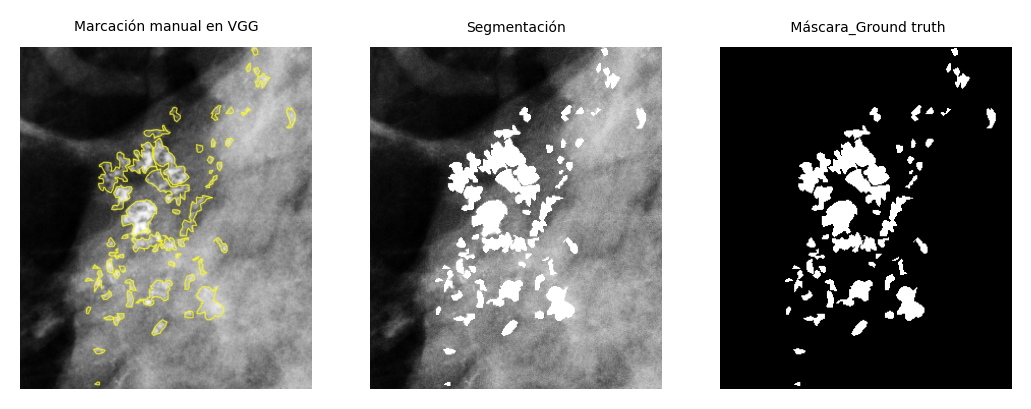

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*    *Microcalcificaciones*







Las microcalcificaciones son depósitos de oxalato cálcico y fosfato cálcico en el tejido mamario que aparecen como manchas blancas en una mamografía. Los mecanismos por los que se producen las microcalcificaciones no se conocen con claridad, aunque se sospecha que intervienen muchos factores, como la edad, los desequilibrios hormonales, el embarazo, la lactancia y los cambios en la dieta (https://www.nature.com/articles/s41598-019-51186-w)

Los depósitos de calcificación se encuentran en el sistema ductal, los acinos mamarios, el estroma y los vasos. Las microcalcificaciones están presentes en aproximadamente el 55% de las neoplasias mamarias no palpables y son responsables de la detección del 85-95% de los casos de carcinoma ductal in situ (CDIS) mediante mamografía , y también pueden estar presentes en cánceres invasivos. El papel de las microcalcificaciones en la detección del cáncer de mama ha sido ampliamente estudiado y algunos grupos de investigación incluso han investigado el papel de las microcalcificaciones en términos de riesgo y progresión del cáncer de mama.

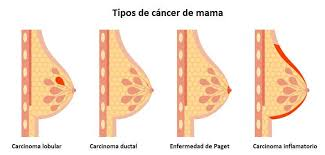

*  Desafios de la segmentación de microcalcificaciones en mamografias:

1.  Tamaño reducido: Las microcalcificaciones generalmente tienen un tamaño que oscila entre Menos de 0.1 mm hasta aproximadamente 1 milímetro de diámetro. Este rango de tamaño puede variar dependiendo de la densidad y composición del tejido mamario.

2. Forma: Pueden ser puntiformes(tiene forma de punto), en forma de líneas o tener una apariencia granular.

3. Distribución: Pueden aparecer solas o en grupos, y la forma en que están distribuidas puede proporcionar pistas importantes sobre su naturaleza benigna o maligna.

4. Superposición de tejidos: Pueden confundirse con tejido cirdundante

*  INFORMACIÓN A TENER EN CUENTA RESPECTO A DISTRIBUCIÓN DE MICROCALCIFICACIONES

Importancia Clínica:

La forma y distribución de las microcalcificaciones puntiformes son importantes para el diagnóstico médico. Las calcificaciones que están dispersas uniformemente suelen ser benignas, mientras que las agrupadas o con patrones específicos pueden ser indicativas de una condición más seria, como el cáncer de mama

*     *Hipotesis*

La población de pixeles en la region de microcalcificacion tiene una distribución donde la media tiene una dimensión fractal más alta que la población de pixeles fuera de la microcalcificación (la población de pixeles que esta en las microcalcificaciones tiene una dimnesión fractal que esta por encima de la dimensión fractal de la media). En terminos de frecuencia, en los puntos donde hay microcalcificaciones hay alta frecuencia.

*     *Dataset*

Base de datos mini-MIAS de mamografías (http://peipa.essex.ac.uk/info/mias.html) .La base de datos mini-MIAS consiste en una colección normalizada de 322 imágenes de mamografías (en blanco y negro), 161 derechas y 161 de izquierda de 1024 × 1024 píxeles.


**1ra columna:**
Número de referencia de la base de datos MIAS.

**2da columna:**
Carácter del tejido de fondo:
  F Graso
  G Graso-glandular
  D densa-glandular

**3ra columna:**
Clase de anormalidad presente:
  CALC Calcificación
  CIRC Masas bien definidas/circunscritas
  SPIC Masas espiculadas
  MISC Otras masas mal definidas
  ARCO Distorsión arquitectónica
  Asimetría ASYM
  NORMA Normal

**4ta columna:**
Gravedad de la anormalidad;
  B Benigno
  M maligno
  
**5ª, 6ª columnas:**
coordenadas de imagen x,y del centro de la anormalidad.
7ma columna:
Radio aproximado (en píxeles) de un círculo que encierra la anomalía.

# FUNCIONES

In [2]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00


In [3]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from skimage import data
from skimage.filters import threshold_multiotsu
import matplotlib
from pydicom import dcmread

In [4]:
# LEER IMAGEN
def leer_imagen(rute):
  imagen= io.imread(rute)
  return(imagen)

ruta='/content/drive/MyDrive/'

In [5]:
# TAMAÑO DE LA IMAGEN Y EL PIXEL MÁXIMO Y MÍNIMO

def tamaño_imagen(imagen):
    print('dimensiones de la imagen', imagen.shape)
    print ('valor MINIMO del pixel:',imagen.min())
    print('valor MÁXIMO del pixel:', imagen.max())

In [6]:
# GRAFICAR UNA IMAGEN CON TÍTULO

def graficar_imagen(imagen, titulo, tamaño=100):
    fig, ax = plt.subplots(dpi=tamaño)
    ax.imshow(imagen,cmap='gray')
    plt.title(str(titulo))
    plt.show

In [7]:
# GRAFICAR 2 IMAGENES HORIZONTALES CON TÍTULO

import matplotlib.pyplot as plt

def graficar_dosimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, titulo1, titulo2, tamaño=100):
    fig, ax = plt.subplots(1, 2, dpi=tamaño)

    # Primer subgráfico
    ax[0].imshow(imagen_oscura, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1))  # Utilizar set_title para establecer el título

    # Segundo subgráfico
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2))  # Utilizar set_title para establecer el título

    plt.show()


In [8]:
#  GRAFICAR 3 IMAGENES HORIZONTAL + TÍTULO

def graficar_tresimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, imagen1, titulo1, titulo2, titulo3, tamaño=400):
    fig, ax = plt.subplots(1,3, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1), fontsize=5)
    #plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2), fontsize=5)
    #plt.title(str(titulo2))
    ax[2].imshow(imagen1, cmap='gray')
    ax[2].set_axis_off()
    ax[2].set_title(str(titulo3), fontsize=5)
    plt.show()

In [9]:
#  GRAFICAR 4 IMAGENES HORIZONTAL + TÍTULO

def graficar_cuatroimagenes_horizontaltitulo(imagen1,imagen2,imagen3,imagen4,titulo1,titulo2,titulo3,titulo4):

    # create figure
    fig = plt.figure(figsize=(24, 26))
    # setting values to rows and column variables
    rows = 1
    columns = 4
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.imshow(imagen1, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo1))
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    # showing image
    plt.imshow(imagen2, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo2))
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    # showing image
    plt.imshow(imagen3, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo3))
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)
    # showing image
    plt.imshow(imagen4, cmap="gray")
    plt.axis('off')
    plt.title(str(titulo4))

In [10]:
# FUNCIÓN PARA CONSTRUIR LAS FRECUENCIAS DE UN HSITOGRAMA DE LUMINANCIAS

def frecuencias(y1, bins):

    intervalo=np.linspace(0,255, bins+1)
    frecuencia=np.zeros(bins)
    print('frecuencia')
    for i in range(bins):
        #print(intervalo[i], intervalo[i+1])
        frecuencia[i]=((y1>=intervalo[i]) * (y1<intervalo[i+1])). sum()
        #print('frecuencia es', frecuencia[i])
        #print(intervalo[i+1])
    frecuencia[bins-1] += (y1==1).sum()
    return(frecuencia,intervalo)

In [11]:
#funcion para recortar imagenes de Mias

def area_afectada(img5, x,y,r):

    img5_copy=np.copy(img5)
    #cv2.line(imagen264_v2,(x1,y1),(x2,y2),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y-r),(x+r,y-r),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y+r),(x+r,y+r),(255,0,0),4)
    cv2.line(img5_copy,(x-r,y-r),(x-r,y+r),(255,0,0),4)
    cv2.line(img5_copy,(x+r,y-r),(x+r,y+r),(255,0,0),4)
    return(img5_copy)

In [173]:
import matplotlib.pyplot as plt

# Función para graficar 10 imágenes con sus títulos
def graficar_diezimagenes_horizontaltitulo(img1, img2, img3, img4, img5, img6, img7, img8, img9, img10,
                                           t1, t2, t3, t4, t5, t6, t7, t8, t9, t10):
    # Crear figura con DPI especificado
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), dpi=200)
    fig.subplots_adjust(hspace=0.1, wspace=0)  # Ajustar el espacio entre subplots

    # Lista de imágenes y títulos
    imgs = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10]
    titles = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

    # Iterar sobre las imágenes y títulos para graficar
    for i, (img, title) in enumerate(zip(imgs, titles)):
        ax = axes[i // 5, i % 5]  # Seleccionar el subplot correspondiente
        ax.imshow(img, cmap="gray")
        ax.axis('off')
        ax.set_title(str(title), fontsize=10)  # Ajustar tamaño de título

    # Mostrar la figura
    plt.show()

# Ejemplo de uso
# img1, img2, ... , img10 son tus imágenes
# t1, t2, ... , t10 son tus títulos
# graficar_diezimagenes_horizontaltitulo(img1, img2, img3, img4, img5, img6, img7, img8, img9, img10,
#                                        "Título 1", "Título 2", "Título 3", "Título 4", "Título 5",
#                                        "Título 6", "Título 7", "Título 8", "Título 9", "Título 10")



In [12]:
#  GRAFICAR 10 IMÁGENES
"""
def graficar_diezimagenes_horizontaltitulo(img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10):

    # create figure
    fig = plt.figure(figsize=(24, 26))
    # setting values to rows and column variables
    rows = 5
    columns = 2
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    # showing image
    plt.imshow(img1, cmap="gray")
    plt.axis('off')
    plt.title(str(t1))
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
    # showing image
    plt.imshow(img2, cmap="gray")
    plt.axis('off')
    plt.title(str(t2))
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)
    # showing image
    plt.imshow(img3, cmap="gray")
    plt.axis('off')
    plt.title(str(t3))
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)
    # showing image
    plt.imshow(img4, cmap="gray")
    plt.axis('off')
    plt.title(str(t4))

    fig.add_subplot(rows, columns, 5)

    plt.imshow(img5, cmap="gray")
    plt.axis('off')
    plt.title(str(t5))

    fig.add_subplot(rows, columns, 6)

    plt.imshow(img6, cmap="gray")
    plt.axis('off')
    plt.title(str(t6))

    fig.add_subplot(rows, columns, 7)

    plt.imshow(img7, cmap="gray")
    plt.axis('off')
    plt.title(str(t7))

    fig.add_subplot(rows, columns, 8)

    plt.imshow(img8, cmap="gray")
    plt.axis('off')
    plt.title(str(t8))

    fig.add_subplot(rows, columns, 9)

    plt.imshow(img9, cmap="gray")
    plt.axis('off')
    plt.title(str(t9))

    fig.add_subplot(rows, columns, 10)

    plt.imshow(img10, cmap="gray")
    plt.axis('off')
    plt.title(str(t10))

"""

# funciones de pre_procesamiento

In [13]:
#PASAR LA  IMAGEN AL ESPACIO Y EN GRIS


import numpy as np

def rgb_a_y(matriz_rgb):
    #La función rgb_a_y toma la matriz matriz_rgb que contiene los valores RGB de cada píxel de la imagen
    matriz_rgb = np.array(matriz_rgb) #la matriz RGB se convierte en un arreglo de NumPy utilizando np.array para permitir operaciones vectorizadas.
    coeficientes = np.array([0.299, 0.587, 0.114]) #se define un arreglo coeficientes que contiene los coeficientes de conversión de RGB a Y.
    matriz_y = np.dot(matriz_rgb, coeficientes) #La matriz RGB se multiplica con los coeficientes utilizando np.dot para calcular la suma ponderada de los canales de color. Esto genera una matriz de luminancia matriz_y
    return matriz_y



In [14]:
# FUNCION _TRANSFORMACIÓN LOGARÍTMICA

def transf_log(img):
  img_log= (255/np.log(256))*np.log(img+1.1)

  return(img_log)

In [15]:
# FUNCIÓN DE TRANSFORMACIÓN DE ANSCOMBE

def anscombe(img):
  img_anscombe= 2.0*np.sqrt(img + 3.0/8.0)
  print("Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:")
  tamaño_imagen(img_anscombe)

  return(img_anscombe)


In [87]:
# UMBRALIZACIÓN DE OTSU

import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu

def triple_umbral_otsu(img_log):
    # Setting the font size for all plots.
    plt.rcParams['font.size'] = 9

    # The input image.
    image = img_log

    # Applying multi-Otsu threshold for the default value, generating
    # three classes.
    thresholds = threshold_multiotsu(image)

    # Using the threshold values, we generate the three regions.
    regions = np.digitize(image, bins=thresholds)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

    # Plotting the original image.
    ax[0].imshow(image, cmap='gray',clim=(0, 1))
    ax[0].set_title('Imagen')
    ax[0].axis('off')

    # Plotting the histogram and the two thresholds obtained from
    # multi-Otsu.
    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histograma')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    # Plotting the Multi Otsu result.
    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu ')
    ax[2].axis('off')

    plt.subplots_adjust()

    print("El triple umbral de OTSU es (Nota: empieza en 0 - hasta 1) =", thresholds)
    print("El triple umbral de OTSU se visualiza con la paleta JET (0=azul, 1=verde, 2=rojo)")

    plt.show()

    return regions, thresholds


In [17]:
# FUNCIÓN FILTRO DE APERTURA

def filto_apertura(img):
  img_otsu_apertura=img.astype(np.uint8)
  # defino el kernel y su tamaño
  kernel1 = np.ones((2,2),np.uint8)
  #aplico el filtro de apertura y defino las veces que voy a aplicar este filtro (iteraciones)
  opening = cv2.morphologyEx(img_otsu_apertura, cv2.MORPH_OPEN, kernel1)

  return(opening)

In [18]:
# FUNCION DE INTENSIDAD MENDIANTE FUNCIÓN COSENO

def funcion_intesidad_coseno(img):
  img_coseno= 1-np.cos((np.pi/2)*(img/255.0))
  #vmin = 0.0162 # Valor mínimo deseado
 # vmax = 0.0193 # Valor máximo deseado
  print("Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:")
  tamaño_imagen(img_coseno)
  #print("el valor minimo del ranjo ajustado vmax es:", vmax)

  return(img_coseno)


In [134]:
# FUNCIÓN FILTRO DOG (DIFERENCIA DE GAUSS)

import cv2

# FUNCIÓN FILTRO DOG (DIFERENCIA DE GAUSS)
def filtro_dog(img, k1, k2):
    dog_low = cv2.GaussianBlur(img, (3, 3), 0)
    dog_high = cv2.GaussianBlur(img, (5, 5), 0)
    dog = k1 * dog_low - k2 * dog_high
    return dog

In [20]:
# FUNCIÓN PARA CONSTRUIR LAS FRECUENCIAS DE UN HSITOGRAMA DE LUMINANCIAS

def frecuencias(y1, bins):

    intervalo=np.linspace(0,255, bins+1)
    frecuencia=np.zeros(bins)
    print('frecuencia')
    for i in range(bins):
        #print(intervalo[i], intervalo[i+1])
        frecuencia[i]=((y1>=intervalo[i]) * (y1<intervalo[i+1])). sum()
        #print('frecuencia es', frecuencia[i])
        #print(intervalo[i+1])
    frecuencia[bins-1] += (y1==1).sum()
    return(frecuencia,intervalo)

In [21]:
# Función para hacer un histograma.

# la función tuene como parametros de entrada: imagen, nro de bins y el titulo. No tiene retorno porque solo es de visualización

def dibujar_histograma(img, n_bins, title=''):
    h = img.ravel()
    _, nbins = np.histogram(h, bins=n_bins, range=[0, 1])

    plt.hist(h, bins=nbins, edgecolor='black')
    plt.title(format(title))
    #plt.grid()
    plt.show()

In [ ]:
# FUNCIÓN PARA DIBUJAR UN RECTANGULO SOBRE AREA AFECTADA_ mamos fito. COORDENADAS PIXEL
"""
def area_afectada_cuatro(img5, x1,y1,x2,y2,x3,y3,x4,y4):

    img5_copy=np.copy(img5)
    #cv2.line(imagen264_v2,(x1,y1),(x2,y2),(255,0,0),4)
    # Dibuja las líneas del rectángulo en color blanco (255, 255, 255)
    cv2.line(img5_copy,(x1,y1),(x2,y2),(255,255,255),5)
    cv2.line(img5_copy,(x2,y2),(x3,y3),(255,255,255),5)
    cv2.line(img5_copy,(x3,y3),(x4,y4),(255,255,255),5)
    cv2.line(img5_copy,(x4,y4),(x1,y1),(255,255,255),5)
    return(img5_copy)
    """

In [22]:
# *********************
import cv2

def area_afectada_cuatro(img5, x1, y1, x2, y2, x3, y3, x4, y4):
    img5_copy = np.copy(img5)

    # Color en formato RGB (255, 87, 51) que corresponde a #FF5733
    color = (255, 87, 51)

    # Dibuja las líneas del rectángulo en el color especificado
    cv2.line(img5_copy, (x1, y1), (x2, y2), color, 5)
    cv2.line(img5_copy, (x2, y2), (x3, y3), color, 5)
    cv2.line(img5_copy, (x3, y3), (x4, y4), color, 5)
    cv2.line(img5_copy, (x4, y4), (x1, y1), color, 5)

    return img5_copy

In [41]:
# funcion para CORTAR UNA IMAGEN mamaria

def imagen_recorte(imagen,y1,y4,x1,x2):
    imagen_recorte= imagen[y1:y4 , x1:x2]
    #graficar_imagen(imagen_recorte , 'imagen recortada', tamaño=90)
    return(imagen_recorte)

In [47]:
# FUNCIÓN ARA HACER 2 HISTOGRAMAS

def hyper_histogram(hyp1, hyp2, n_bins, title1='', title2=''):

    h1 = hyp1[:,:].ravel()
    h2 = hyp2[:,:].ravel()
    _, nbins = np.histogram(h1, bins=n_bins, range=[0, 1])

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].hist(h1, bins=nbins, edgecolor='black')
    axs[0].set_title(format(title1))
    plt.grid()
    axs[1].hist(h2, bins=nbins, edgecolor='black')
    axs[1].set_title(format(title2))
    plt.grid()
    plt.show()

# EJECUCIÓN




*     *1. Preprocesamiento*

Para el pre-procesamiento de la imagen se realizarán los pasos desarrollados a continuación:

In [23]:
# INFORMACIÓN DEL DATASET 'MIAS'

#mg_df =pd.read_table('/content/drive/MyDrive/Info.txt', sep=" " )
print('Dataset MIAS')
print('nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c')
#print(mg_df)
#mg_df.head()

Dataset MIAS
nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c


In [24]:
# FILTRO IMAGENES CON ANOMALIAS (ANOR), MICROCALCIFICCAIONES (CALC) MALIGNAS (M)

#df_calc = mg_df[mg_df['ANOR'] == 'CALC'] #30 con calcificaciones
#df_calc = mg_df[mg_df['G']== 'M']
#df_calc.head(100)


# **Mamografias**

# **PASO 1. LEO: Imagen mamografia original**

dimensiones de la imagen (4096, 3328)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 4095


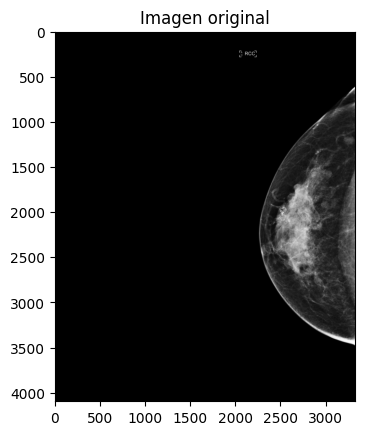

In [25]:
# Leo la imagen de la mamografia Original


img_original = dcmread(ruta + 'Articulo mamografias-2024/JAURI_LIDIAM_2021-01-13_RCC_1.2.840.113681.168431371.1610352954.3928.1962.dcm')

img_original = img_original.pixel_array #convertir imagen .dcm a Array
graficar_imagen(img_original , 'Imagen original', tamaño=100)
tamaño_imagen(img_original)

#  Marcación de la mamografia

Espacio y - Imagen Original

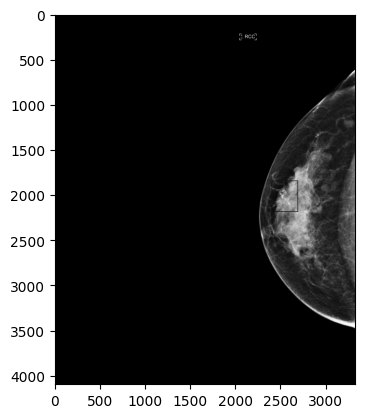

In [39]:
imagen_marcada=area_afectada_cuatro(img_original, 2397,1848,2684,1846,2684,2187,2396,2186)
plt.imshow(imagen_marcada, cmap='gray')

In [40]:
#graficar_dosimagenes_horizontaltitulo(img_original,imagen_marcada, 'Img original', 'Img Marcada gris ', tamaño=120)

#  Recorto la mamografia

tamaño recorte de la img original: 
dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 113
valor MÁXIMO del pixel: 4060
tamaño recorte de la img original después de NORMALIZAR: 
dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


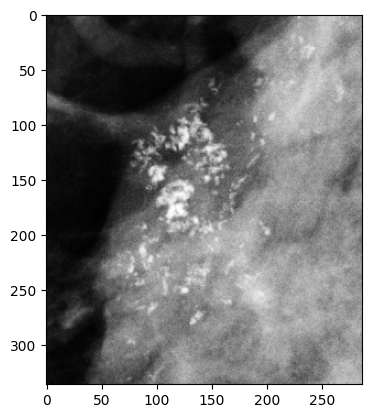

In [42]:
# Invoco una funcion para CORTAR UNA IMAGEN mamaria

imagen_recorte= imagen_recorte(img_original,1848,2184,2397,2684)  # hago el recorte a la imagen original
print("tamaño recorte de la img original: ")
tamaño_imagen(imagen_recorte)

#Normalizo el recorte de la imagen original

imagen_recorte_norm=(imagen_recorte - imagen_recorte.min()) / (imagen_recorte.max() - imagen_recorte.min())  # normalizo la imagen y la llevo a la escala de 0 a 1
print("tamaño recorte de la img original después de NORMALIZAR: ")
tamaño_imagen(imagen_recorte_norm)
plt.imshow(imagen_recorte_norm, cmap='gray')

In [44]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


*  Guardo el recorte son bordes blancos y con dimensiones originales
***

dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


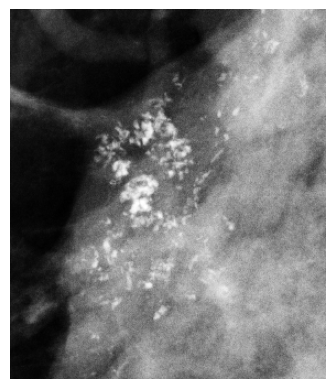

In [ ]:
# GUARDO LA IMAGEN: recorte_img209_gris - Guarda la figura sin ejes y bordes

# Guardar imagen---SIN EJES NI BORDES
plt.imsave('recorte_img209_gris-etiqueta5.png', imagen_recorte_norm, cmap='gray')
tamaño_imagen(imagen_recorte_norm)

# Ocultar ejes y bordes solo para la visualización
plt.axis('off')
plt.imshow(imagen_recorte_norm, cmap='gray')

# APLICO METODODLOGIA:

## 1.2. Triple umbral de OTSU:

 la imagen se segmentó en tres clases según el método de umbral múltiple de Otsu. Se mantuvieron las dos clases más luminosas ya que correspondían a la región mamaria y los demás objetos de la mamografía, mientras que la más oscura correspondía al fondo. La mascara de otsu da 3 valores 0=azul, 1=verde,  2=rojo (donde estan las micro)

# 1.2.1 Filtro potencia

Antes de hacerle Otsu al recorte, le aplico un filtro potencia 4, para que me oscureszca la imagen y elimine puntos blancos que pueden ser falsos positivos

El triple umbral de OTSU es (Nota: empieza en 0 - hasta 1) = [0.09179688 0.27148438]
El triple umbral de OTSU se visualiza con la paleta JET (0=azul, 1=verde, 2=rojo)


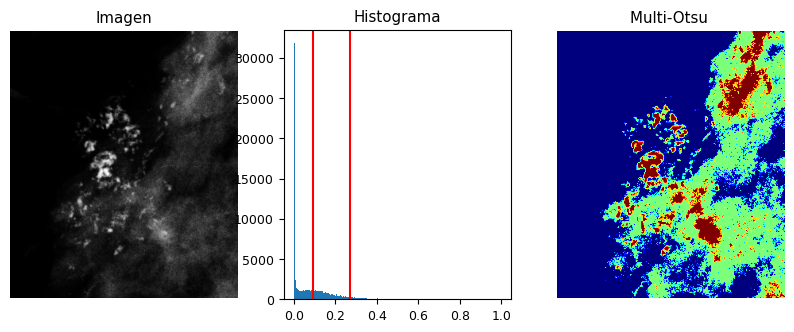

In [94]:
factor = 4  # selecciono un filtro de potencia 4

imagen_recorte_norm_potencia= imagen_recorte_norm**factor

# Aplico umbral triple de Otsu a la imagen y filtro potencia factor=4
resultados_segmentacion,umbral_multiOtsu = triple_umbral_otsu(imagen_recorte_norm_potencia)

In [102]:
# Array multiOtsu
print("el umbral MultiOtsu es en el rango de:", umbral_multiOtsu)

umbral_menor, umbral_mayor= umbral_multiOtsu

el umbral MultiOtsu es en el rango de: [0.09179688 0.27148438]


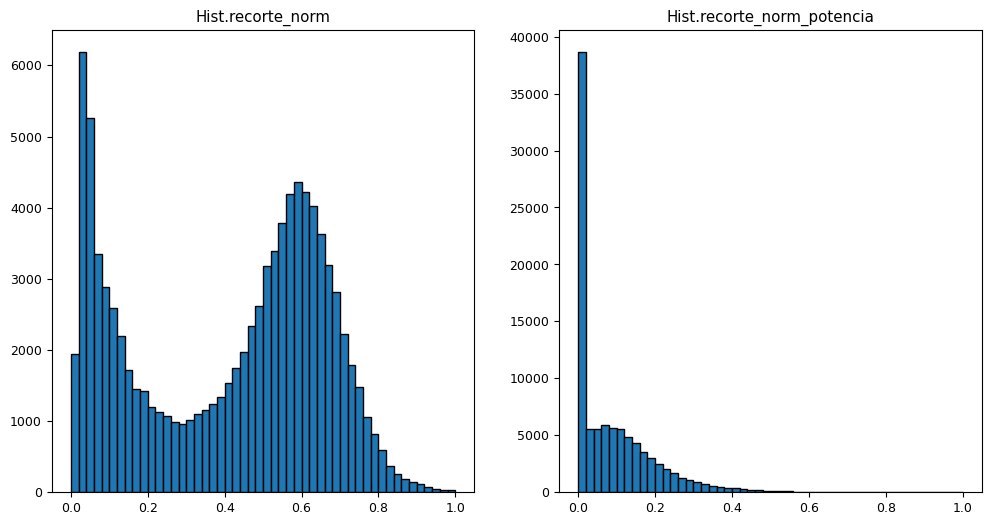

In [79]:
hyper_histogram(imagen_recorte_norm, imagen_recorte_norm_potencia , 50, title1='Hist.recorte_norm', title2='Hist.recorte_norm_potencia')

In [176]:
# RESULTADO DEL filtro potencia y TRIPLE UMBRAL DE Otsu

#plt.imshow(resultados_segmentacion)

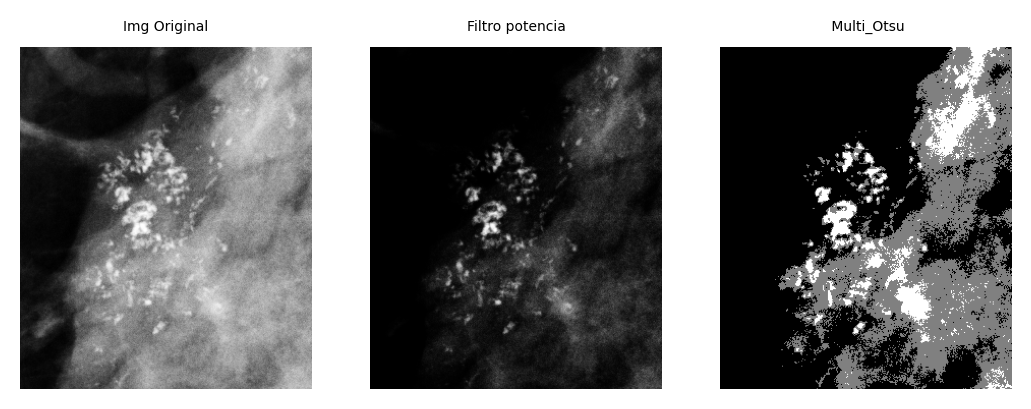

In [81]:
graficar_tresimagenes_horizontaltitulo(imagen_recorte_norm, imagen_recorte_norm_potencia, resultados_segmentacion,
                                       'Img Original','Filtro potencia', ' Multi_Otsu', tamaño=200)

La imagen resultande de la umbralización de Otsu  la binarizo (la pongo en colores negro y blanco). Los valores menores a 2 los haga fondo (negro=0) y los valores 2 quedan blancos(microcalcificaciones)

## 1.2.1. Generacion de la mascara obtenida  en otsu

pixel valor minimo 0.0
pixel valor maximo 1.0


(336, 287)

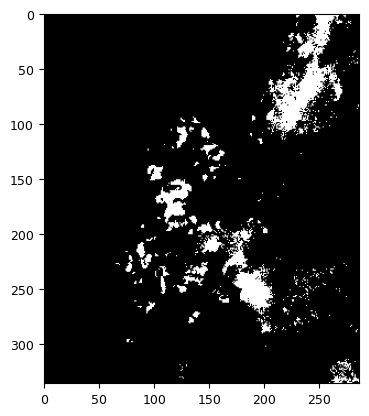

In [123]:
from typing_extensions import assert_type
import copy

#MASCARA DE OTSU
#plt.imshow(resultados_segmentacion, cmap='gray' )
resultados_segmentacion.shape

# Hago una copia de la imagen  de otsu

resultados_segmentacion_copia1= copy.copy(resultados_segmentacion)

# Aplico el umbral - Modifico el threshold

resultados_segmentacion_copia1[resultados_segmentacion<2 ] = 0  # 2 porq la mascara de otsu da 3 valores 0=azul, 1=verde,  2=rojo (donde estan las micro)
plt.imshow(resultados_segmentacion_copia1, cmap='gray')

# lo normalizo entre 0 y 1 para que me quede en el rango que tiene la mascara segmenteda  manual
resultados_segmentacion_copia1 = resultados_segmentacion_copia1/np.max(resultados_segmentacion_copia1)

#resultados_segmentacion_copia1*=127.5

print("pixel valor minimo",np.min(resultados_segmentacion_copia1))
print("pixel valor maximo",np.max(resultados_segmentacion_copia1))
resultados_segmentacion_copia1.shape

# CLASES SEGÚN LUMINANCIAS DE PÍXELES: - fondo, piel, microcalcificaciones

Se usaran los umbrales del MultiOtsu: 0.091796875 0.271484375

Tabla de resultados:
  Categoría  Cantidad de píxeles  Porcentaje de píxeles  Valor medio  \
0   Clase 1                58936              61.116642     0.020803   
1   Clase 2                30691              31.826572     0.159909   
2   Clase 3                 6805               7.056786     0.383560   

   Desviación estándar  
0             0.028612  
1             0.047923  
2             0.120161  


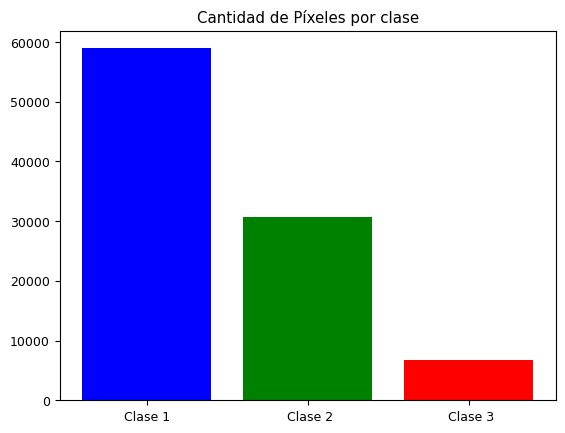

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que imagen_recorte_norm_potencia ya ha sido definido y tiene valores válidos

# Umbralización basada en los valores dados
imagen_umbralizada = np.zeros_like(imagen_recorte_norm_potencia)

# Definimos los umbrales (umbral_menor y umbral_mayor fueron obtenidos en el multiOtsu)
umbral_1 = umbral_menor
umbral_2 = umbral_mayor
print("Se usaran los umbrales del MultiOtsu:",umbral_1 ,umbral_2)

# Aplicamos la umbralización
imagen_umbralizada[imagen_recorte_norm_potencia <= umbral_1] = 0
imagen_umbralizada[(imagen_recorte_norm_potencia > umbral_1) & (imagen_recorte_norm_potencia <= umbral_2)] = 1
imagen_umbralizada[imagen_recorte_norm_potencia > umbral_2] = 2

# Contamos los píxeles en cada categoría
contador_menores = np.count_nonzero(imagen_umbralizada == 0)
contador_entre = np.count_nonzero(imagen_umbralizada == 1)
contador_mayores = np.count_nonzero(imagen_umbralizada == 2)

# Calculamos el porcentaje de píxeles por categoría
total_pixeles = np.prod(imagen_umbralizada.shape)
porcentaje_menores = (contador_menores / total_pixeles) * 100
porcentaje_entre = (contador_entre / total_pixeles) * 100
porcentaje_mayores = (contador_mayores / total_pixeles) * 100

# Calculamos el valor medio y la desviación estándar por categoría
valor_medio_menores = np.mean(imagen_recorte_norm_potencia[imagen_umbralizada == 0])
valor_medio_entre = np.mean(imagen_recorte_norm_potencia[imagen_umbralizada == 1])
valor_medio_mayores = np.mean(imagen_recorte_norm_potencia[imagen_umbralizada == 2])

desviacion_estandar_menores = np.std(imagen_recorte_norm_potencia[imagen_umbralizada == 0])
desviacion_estandar_entre = np.std(imagen_recorte_norm_potencia[imagen_umbralizada == 1])
desviacion_estandar_mayores = np.std(imagen_recorte_norm_potencia[imagen_umbralizada == 2])

# Crear DataFrame para tabla
data = {
    'Categoría': ['Clase 1', ' Clase 2', ' Clase 3'],
    'Cantidad de píxeles': [contador_menores, contador_entre, contador_mayores],
    'Porcentaje de píxeles': [porcentaje_menores, porcentaje_entre, porcentaje_mayores],
    'Valor medio': [valor_medio_menores, valor_medio_entre, valor_medio_mayores],
    'Desviación estándar': [desviacion_estandar_menores, desviacion_estandar_entre, desviacion_estandar_mayores]
}
df = pd.DataFrame(data)

# Imprimir tabla
print("\nTabla de resultados:")
print(df)

# Crear gráfico de barras
plt.bar(df['Categoría'], df['Cantidad de píxeles'], color=['blue', 'green', 'red'])
plt.title('Cantidad de Píxeles por clase')
plt.xlabel('')
plt.ylabel('')
plt.show()


## 1.2.3. Filtrado morfologico a la mascara de otsu: por apertura

se le realiza el filtrado de apertura a la mascara obtenida en otsu, en esta mascara solo se ve el seno delimitado

tamaño de la imagen: (336, 287)
pixel máx 1
pixel min 0


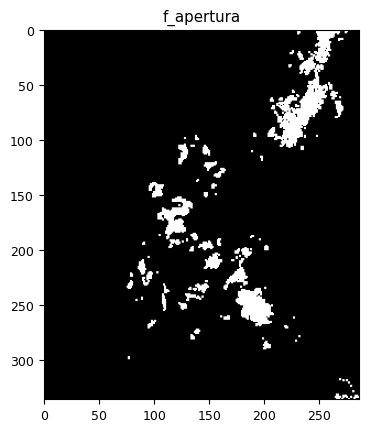

In [125]:
img_apertura= filto_apertura(resultados_segmentacion_copia1)  # con Kernel de 3*3
graficar_imagen(img_apertura , 'f_apertura', tamaño=100)
print('tamaño de la imagen:', img_apertura.shape)
print('pixel máx', np.max(img_apertura))
print('pixel min', np.min(img_apertura))


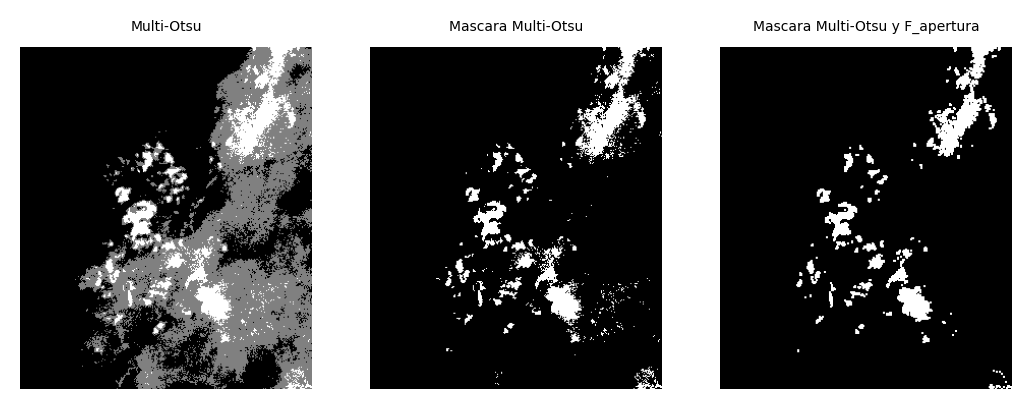

In [111]:
graficar_tresimagenes_horizontaltitulo(resultados_segmentacion,resultados_segmentacion_copia1,img_apertura, 'Multi-Otsu',
                                       'Mascara Multi-Otsu','Mascara Multi-Otsu y F_apertura', tamaño=200)

## 1.3. Convolucion entre la mascara de otsu y la imagen original

dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


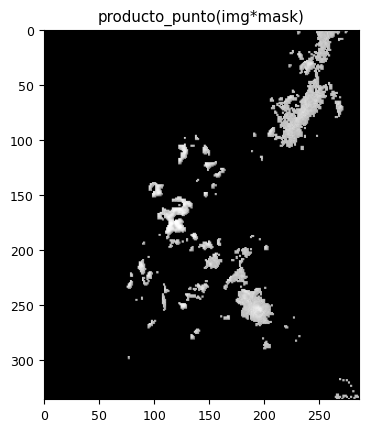

In [114]:
#PRODUCTO PUNTO ENTRE LA IMAGEN ORIGINAL RECORTADA Y NORMALIZADA * CON LA MASCARA OBTENIDA EN LA BINARIZACIÓN DE OTSU+f. Apertura

producto= imagen_recorte_norm*img_apertura
graficar_imagen(producto , 'producto_punto(img*mask)', tamaño=100)
tamaño_imagen(producto)

## 2.1.Función de Anscombe

Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:
dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 1.224744871391589
valor MÁXIMO del pixel: 2.345207879911715


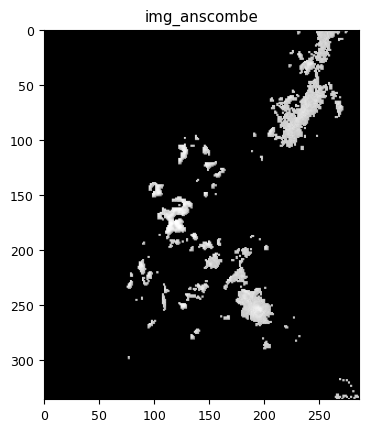

In [139]:
# APLICO LA FUNCIÓN DE ANSCOMBE

img_anscombe= anscombe(producto)
graficar_imagen(img_anscombe , 'img_anscombe', tamaño=100)


## 2.2.  transformaciones de intensidad mediante la función coseno

Ajustar el rango según el tamaño del pixel max y min de la imágen!!!:
dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 2.8458931914276953e-05
valor MÁXIMO del pixel: 0.00010434809716375337


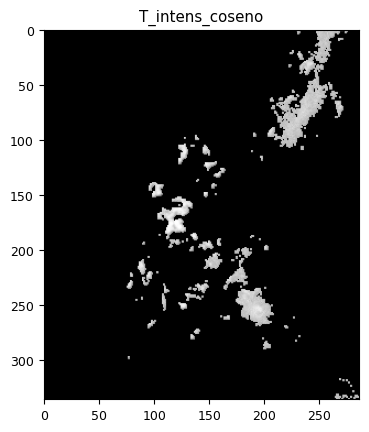

In [127]:
# APLICO LA FUNCION DE TRANSFORMACIÍN DE INTENSIDAD MEDIANTE FUNCIÓN COSENO

img_coseno= funcion_intesidad_coseno(img_anscombe)
graficar_imagen(img_coseno, 'T_intens_coseno', tamaño=100)
#graficar_dosimagenes_horizontaltitulo( img_limpia,img_coseno, "limpia", "coseno", tamaño=100)

## 2.3. Filtro DOG

dimensiones de la imagen (336, 287)
valor MINIMO del pixel: -3.2681734546438128e-06
valor MÁXIMO del pixel: 2.790456035040049e-05
******************************************************
tamaño recorte de la img original después de NORMALIZAR: 
dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


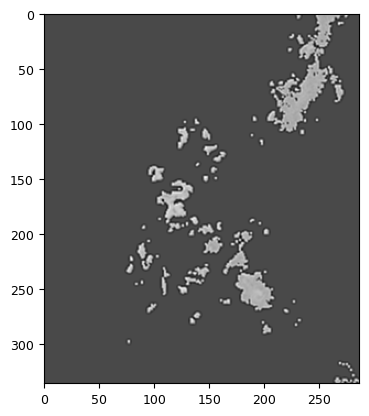

In [175]:
# APLICO EL FILTRO DOG

img_dog1 = filtro_dog(img_coseno, k1=1.1, k2=0.9)
#graficar_imagen(img_dog1, 'F_DOG', tamaño=100)
tamaño_imagen(img_dog1)
print('******************************************************')
#Normalizo la imagen DOG

img_dog1_norm=(img_dog1 - img_dog1.min()) / (img_dog1.max() - img_dog1.min())  # normalizo la imagen y la llevo a la escala de 0 a 1
print("tamaño recorte de la img original después de NORMALIZAR: ")
tamaño_imagen(img_dog1_norm)
plt.imshow(img_dog1_norm, cmap='gray')

IMAGEN  RESULTANTE, FINAL DE LA METODOLOGÍA

dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 0.9272540836150133
******************************************************
tamaño recorte de la img original después de NORMALIZAR: 
dimensiones de la imagen (336, 287)
valor MINIMO del pixel: 0.0
valor MÁXIMO del pixel: 1.0


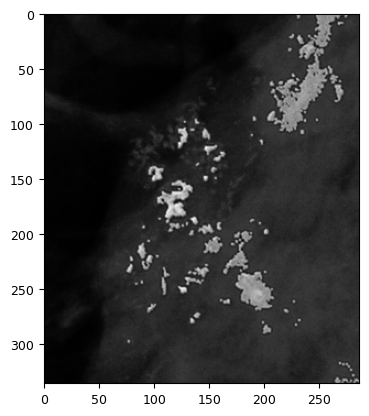

In [156]:
img_final_metodologia= img_dog1_norm*imagen_recorte_norm
tamaño_imagen(img_final_metodologia)
#graficar_imagen(img_final_metodologia, 'Img_final', tamaño=100)

print('******************************************************')
#Normalizo la imagen Final

img_final_metodologia_norm =(img_final_metodologia- img_final_metodologia.min()) / (img_final_metodologia.max() - img_final_metodologia.min())  # normalizo la imagen y la llevo a la escala de 0 a 1
print("tamaño recorte de la img original después de NORMALIZAR: ")
tamaño_imagen(img_final_metodologia_norm)
plt.imshow(img_final_metodologia_norm, cmap='gray')

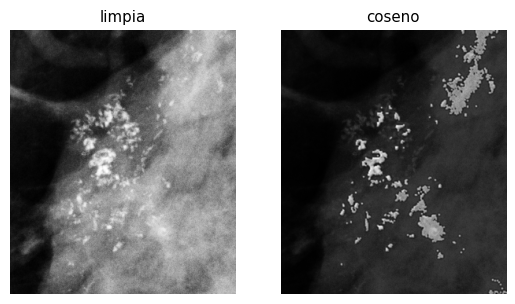

In [157]:
graficar_dosimagenes_horizontaltitulo( imagen_recorte_norm,img_final_metodologia_norm, "limpia", "coseno", tamaño=100)

#  IMAGENES IMPORTANTES EN LA METODOLOGÍA DE SEGMENTACIÓN AUTOMÁTICA

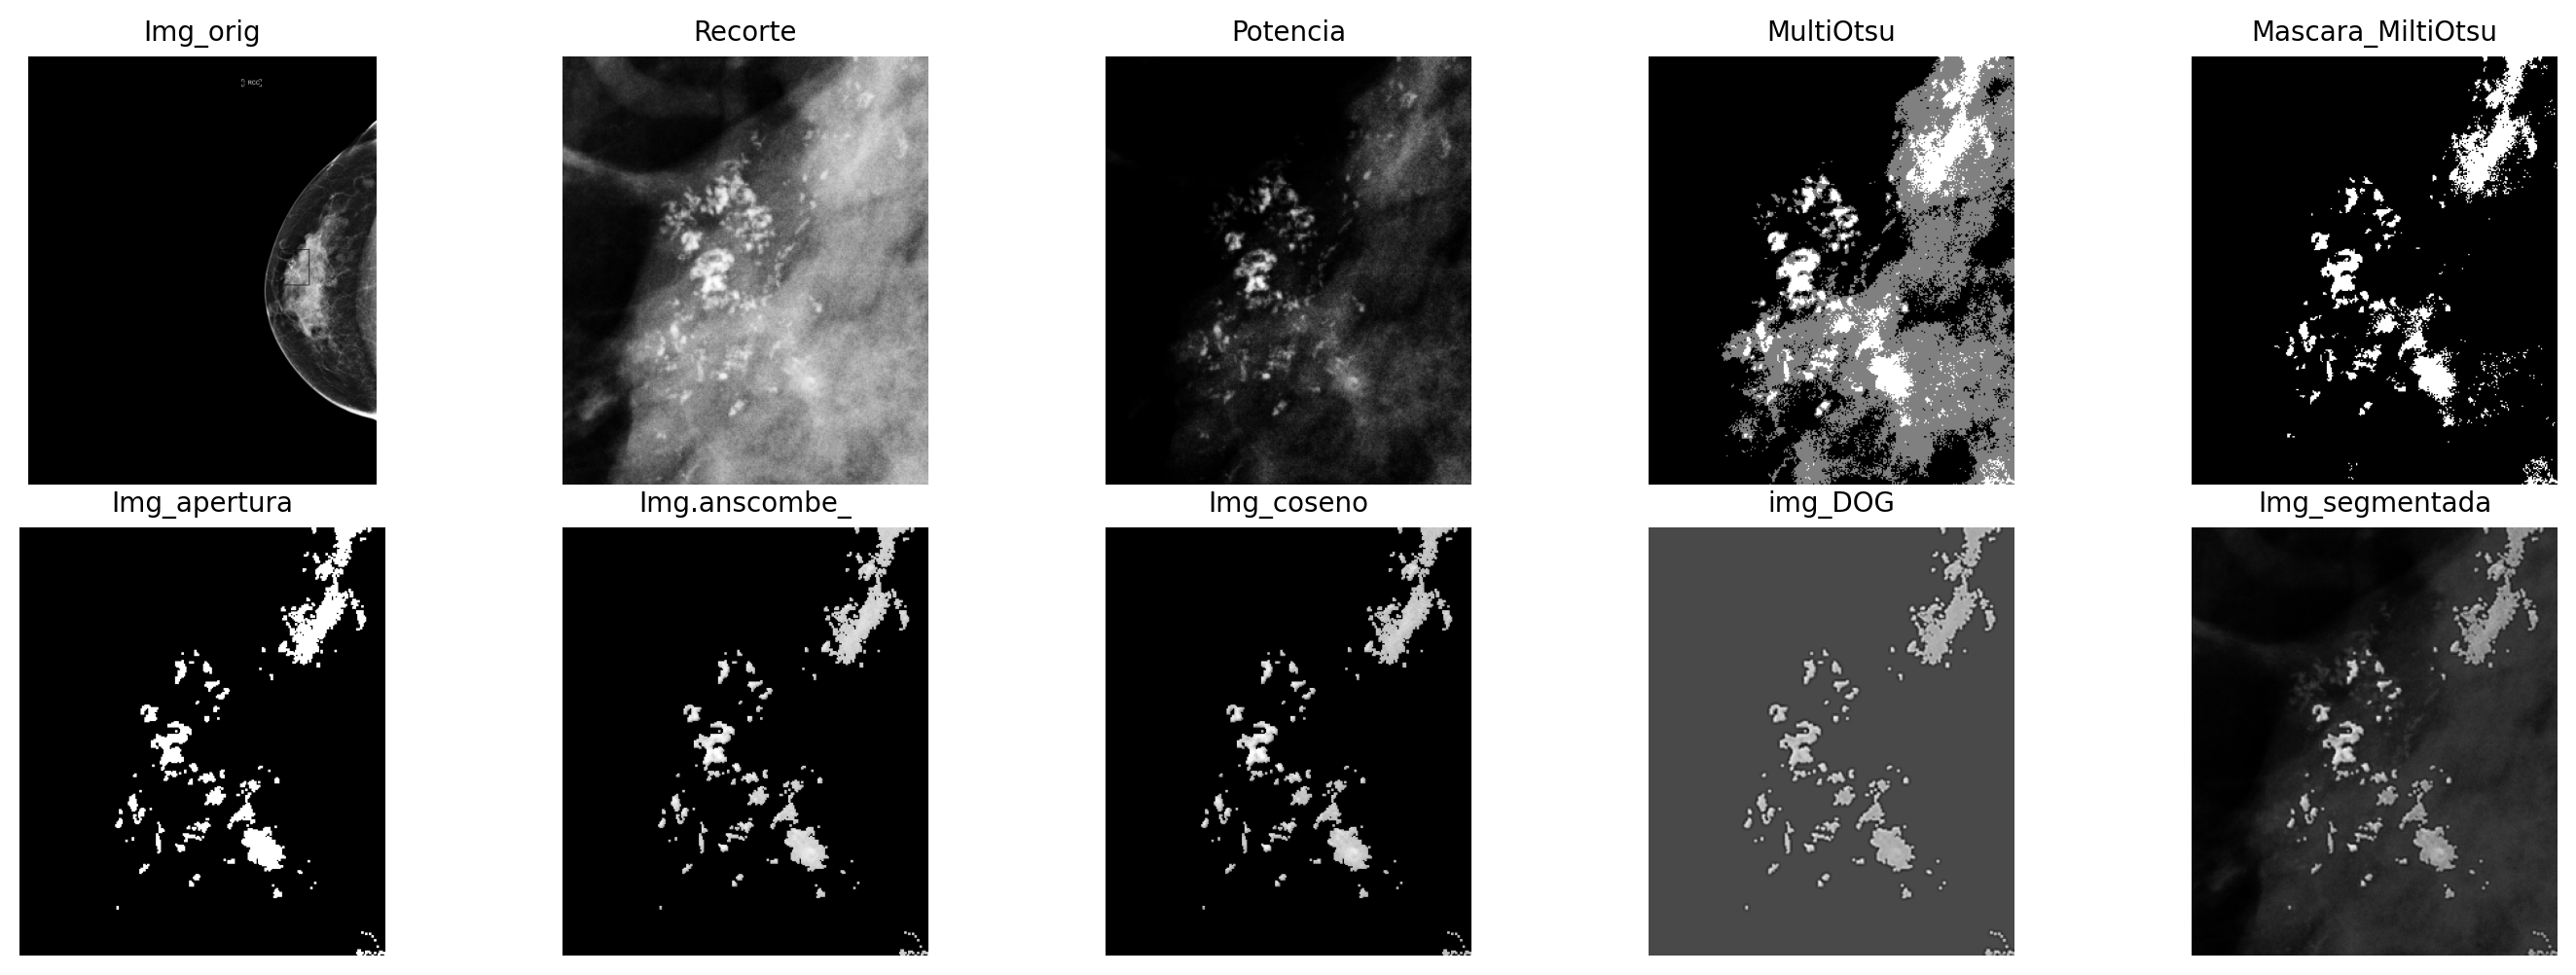

In [174]:
graficar_diezimagenes_horizontaltitulo(imagen_marcada ,imagen_recorte_norm, imagen_recorte_norm_potencia, resultados_segmentacion,
                                       resultados_segmentacion_copia1, img_apertura, img_anscombe, img_coseno,  img_dog1, img_final_metodologia_norm,
                                       'Img_orig','Recorte','Potencia','MultiOtsu','Mascara_MiltiOtsu','Img_apertura','Img.anscombe_',
                                       'Img_coseno','img_DOG','Img_segmentada')

#  DATASET MIAS

In [ ]:
# Recorto la imagen considerando las coordenadas donde se encuentran las microcalcificaciones
"""
recorte_209_prepro=imagen_recorte(img_dog1,  1034, 825, 66)
graficar_imagen(recorte_209_prepro , 'Recorte_preprocesamiento', tamaño=150)
recorte_209_prepro.shape
tamaño_imagen(recorte_209_prepro)
"""

In [ ]:
"""
# APLICO LA FUNCIÓN PARA DIBUJAR EL AREA AFECTADA (x,y,r)

dibujo_area_afectada= area_afectada((img_dog1/img_dog1.max())*255.0, 1034, 825, 66)
graficar_imagen(dibujo_area_afectada, 'Area afectada', tamaño=100)
#graficar_dosimagenes_horizontaltitulo( imagen209, dibujo_area_afectada, "img_209", "pre-proc", tamaño=150)
"""